<a href="https://colab.research.google.com/github/pccalegari/exemplos-CN/blob/main/CN_unidade4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# Unidade 4 - Aproximação de funções




Nesta unidade, vamos estudar métodos para aproximar funções e dados tabelados. Veremos duas maneiras de aproximar funções: a **Interpolação** e o **Método dos Mínimos Quadrados**. A seguir, apresentamos alguns exemplos de resolução em *Python*. Vamos utilizar as bibliotecas [numpy](https://numpy.org/) e [scipy](https://scipy.github.io/devdocs/index.html).

# Interpolação

**Forma de Newton**

Algoritmo - Tabela de Diferenças Divididas



1.   Dados $x_i$ e $f(x_i)$,  $n+1$ pontos.
2.   Para $i=0:n$
3.   $\hspace{1pc}$  $d_{i0}=f(x_i)$
4.   Para $k = 1:n$
5.   $\hspace{1pc}$ Para $i=0:n-k$
6.   $\hspace{2pc} d_{ik}=\dfrac{d_{i+1,k-1}-d_{i,k-1}}{x_{i+k}-x_i}$


O polinômio é dado por 

$$p(x) = f[x_0]+f[x_0,x_1](x-x_0)+f[x_0,x_1,x_2](x-x_0)(x-x_1)+\ldots+f[x_0,x_1,\ldots,x_{n-1},x_n](x-x_0)(x-x_1)\ldots(x-x_{n-1}),$$

onde $f[x_0]=f(x_0)$ e para qualquer $k$, $$f[x_0,x_1,\ldots,x_k,x]=\dfrac{f[x_0,x_1,\ldots,x_{k-1},x]-f[x_0,x_1,\ldots,x_k]}{x-x_k}$$






In [12]:
import numpy as np
import matplotlib.pyplot as plt


In [13]:
def f(x):
  return(1/(1+x**2))

def dif_div(x,y):
  n = len(x)
  d = np.zeros((n,n))
  c = np.zeros(n)

  for i in range(n):
    d[i,0] = y[i]
  for k in range(1,n):
    for i in range(n-k):
      d[i,k] = (d[i+1,k-1] - d[i,k-1])/(x[i+k] - x[i])

  for i in range(n):
    c[i] = d[0,i]

  return(c)



In [18]:
N = 9
a = -4
b = 4
h = (b-a)/(N-1)
x = np.arange(a, b+h, h)
y = f(x)

c = dif_div(x, y)
print(c)

[ 0.05882353  0.04117647  0.02941176  0.02352941 -0.00588235 -0.00882353
  0.00647059 -0.00235294  0.00058824]


In [19]:
def p(x0, x, c):
  n = len(c)
  vp = np.zeros(n)
  vp[0] = c[0]
  ss = 1
  px0 = 0
  for i in range(1,n):
    ss *= (x0 - x[i-1])
    vp[i] = c[i]*ss
  for i in range(n):
    px0 += vp[i] 
  return px0



**Exemplo** (Fenômeno de Runge)

Seja $$f(x)=\dfrac{1}{1+x^2}, x\in(-4,4)$$

Para $n$ inteiro, $p_n(x)$ é o polinômio interpolador de $f(x)$ nos pontos igualmente espaçados $x_0,x_1,\ldots,x_n$, dados por $x_i=-4 + i\cdot h$ e $h = 8/n$. Note que aumentarmos o número de pontos o erro aumenta.



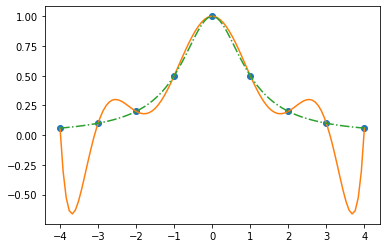

In [20]:
x_pol = np.linspace(a, b, 100)
y_pol = np.zeros(len(x_pol))
f_pol = np.zeros(len(x_pol))
for i in range(len(x_pol)):
  y_pol[i] = p(x_pol[i], x, c)
  f_pol[i] = f(x_pol[i])
#print(x_pol)
#print(y_pol)

plt.figure(1)
plt.plot(x, y, 'o')
plt.plot(x_pol, y_pol)
plt.plot(x_pol, f_pol, '-.')
plt.show()

Uma solução é utilizar a interpolação por partes.

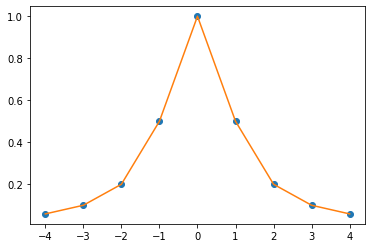

In [ ]:
import matplotlib.pyplot as plt

from scipy import interpolate

#xx = np.arange(-5,5,0.1)
#m = len(xx)
#yy = np.zeros(m)
#yy = f(xx)
a = -4
b = 5
x = np.arange(a, b)
n = len(x)
y = np.zeros(n)
y = f(x)

p = interpolate.interp1d(x, y)

xnew = np.arange(a, b)

ynew = p(xnew)   

plt.plot(x, y, 'o', xnew, ynew, '-')


plt.show()

# Método dos Mínimos Quadrados


Objetivo: Minimizar resíduo (erro).

Para obter a melhor aproximação vamos minimizar a função:

$$  r({\bf a}) = \dfrac{1}{2}\sum_{i=1}^m r_i({\bf a})^2,$$

sendo o resíduo $r_i({\bf a}) = f(x_i,{\bf a}) - y_i$, com $(x_i,y_i)$ dados e $m$ tamanho dos vetores $x$ e $y$. 

Para ajustar os parâmetros da função $r({\bf a})$ vamos utilizar as bibliotecas *numpy* e *scipy*. 


**Exemplo (1)**

Ajustar os dados abaixo usando uma reta (Regressão linear):

$$\begin{array}{c|ccccc}
x_i & 0 & 0.25 & 0.5 & 0.75 & 1\\
\hline
f(x_i) & 1 & 1.2840 & 1.6487 & 2.1170 & 2.7183 \\
\end{array}$$

*Solução:*

A função aproximadora é dada por $g(x)=a_0 + a_1x$. A tabela possui $5$ pontos portanto $m=5$. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy import interpolate
from numpy import linalg as LA


Abaixo são definidas a função aproximadora e a função resíduo.

In [ ]:
def flinear(x, a):
    y = a[0] + a[1]*x 
    return y

def rlinear(a, x, y):
    return a[0] + a[1]*x - y


Insira os dados do problema: vetores $x$ e $y$.

In [ ]:
xi = np.array([0, 0.25, 0.5, 0.75 , 1])
m = len(xi)
yi = np.array([1, 1.2840, 1.6487, 2.117, 2.7183])

Aqui segue uma solução com a resolução do sistema normal.

In [ ]:
v_1 = np.ones(m)

A = np.zeros((2,2))
b = np.zeros(2)
A[0,0] = np.vdot(v_1,v_1)
A[1,0] = np.vdot(v_1,xi)
A[0,1] = A[1,0]
A[1,1] = np.vdot(xi, xi)
b[0] = np.vdot(v_1, yi)
b[1] = np.vdot(xi, yi)
print(A)

a1 = np.linalg.solve(A, b)
print(a1)

[[5.    2.5  ]
 [2.5   1.875]]
[0.89968 1.70784]


Aqui segue uma solução utilizando métodos de otimização.

In [ ]:
x_min = xi[0]
x_max = xi[n-1]

x0 = np.array([0.1, 0.1])

res_lin = optimize.least_squares(rlinear, x0, args=(xi, yi))
    
print("Parâmetros do ajuste Linear")
print(res_lin)
a = np.array([res_lin.x[0], res_lin.x[1]]) 
print("a = ", a)
    

Parâmetros do ajuste Linear
 active_mask: array([0., 0.])
        cost: 0.019599182000000024
         fun: array([-0.10032,  0.04264,  0.1049 ,  0.06356, -0.11078])
        grad: array([-1.22124533e-15,  4.63304672e-10])
         jac: array([[1.  , 0.  ],
       [1.  , 0.25],
       [1.  , 0.5 ],
       [1.  , 0.75],
       [1.  , 1.  ]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 5
        njev: 5
  optimality: 4.6330467240451867e-10
      status: 1
     success: True
           x: array([0.89968, 1.70784])
a =  [0.89968 1.70784]


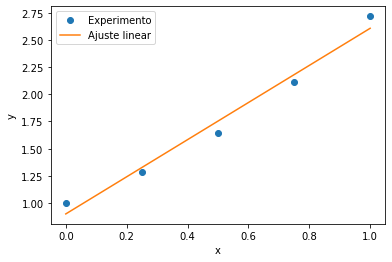

In [ ]:
x_test = np.linspace(x_min, x_max, 100)
 
y_lin = flinear(x_test, a)
  
plt.figure(1)
plt.plot(xi, yi, 'o', label='Experimento')
plt.plot(x_test, y_lin, label='Ajuste linear')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()